In [10]:
from astropy.io import fits
import h5py
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [11]:
# short dipole
phi = np.linspace(0, 2*np.pi, 360, endpoint=False)
theta = np.linspace(0, np.pi/2, 91)
P, T = np.meshgrid(phi, theta)
x = np.sin(T) * np.cos(P)
Ax = np.sqrt(1 - x**2)
E_theta = Ax * np.cos(P)
E_phi = Ax * np.sin(P)

short_X = np.array([E_theta, E_phi])
short_Y = np.roll(short_X, 90, axis=-1)

In [14]:
# lusee beam
def read_beam(fname):
    with fits.open(fname) as hdul:
        E_theta = hdul["Etheta_real"].data + 1j * hdul["Etheta_imag"].data
        E_phi = hdul["Ephi_real"].data + 1j * hdul["Ephi_imag"].data
        ix = np.argwhere(hdul["freq"].data == 1)[0, 0]
        E_theta = E_theta[ix]
        E_phi = E_phi[ix]

    lusee_X = np.array([E_theta, E_phi])[:, :, :-1]
    lusee_X /= lusee_X.max(axis=(1, 2))[:, None, None]
    #lusee_Y = np.roll(lusee_X, 90, axis=-1)
    return lusee_X
    
hfss = read_beam("hfss_lbl_3m_75deg.2port.fits")
feko = read_beam("feko_bnl_3m_75deg.2port.fits")
feko = np.roll(feko, 180, axis=-1)

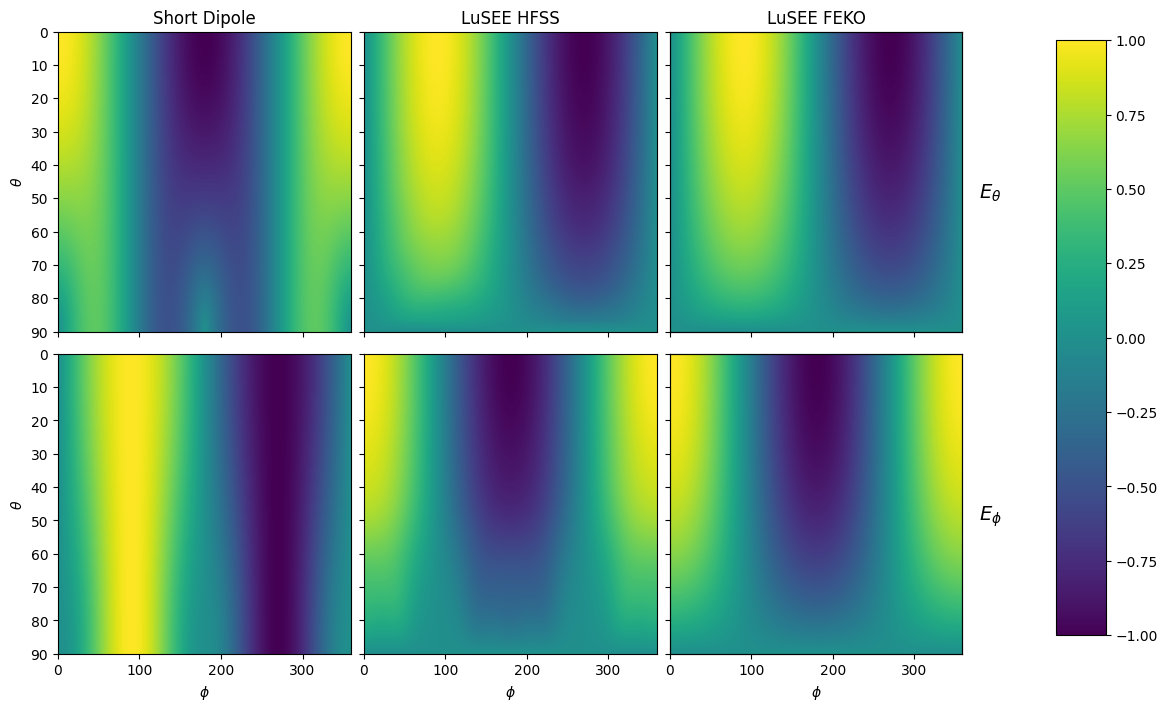

In [19]:
fig, axs = plt.subplots(figsize=(10, 7), nrows=2, ncols=3, sharex=True, sharey=True, layout="constrained")
extent = np.rad2deg([phi.min(), phi.max(), theta.max(), theta.min()])
for i in range(2):
    im = axs[i, 0].imshow(short_X[i], extent=extent, aspect="auto")
    im.set_clim(-1, 1)
    im = axs[i, 1].imshow(hfss[i].real, extent=extent, aspect="auto")
    im.set_clim(-1, 1)
    im = axs[i, 2].imshow(feko[i].real, extent=extent, aspect="auto")
    im.set_clim(-1, 1)


cbar_ax = fig.add_axes([1.05, 0.1, 0.05, .85])
fig.colorbar(im, cax=cbar_ax)    
    
axt = axs[0, -1].twinx()
axt.set_ylabel("$E_{\\theta}$", fontsize=14, rotation=0, labelpad=20)
axt.set_yticks([])
axp = axs[1, -1].twinx()
axp.set_ylabel("$E_{\\phi}$", fontsize=14, rotation=0, labelpad=20)
axp.set_yticks([])
axs[0, 0].set_title("Short Dipole")
axs[0, 1].set_title("LuSEE HFSS")
axs[0, 2].set_title("LuSEE FEKO")
plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()

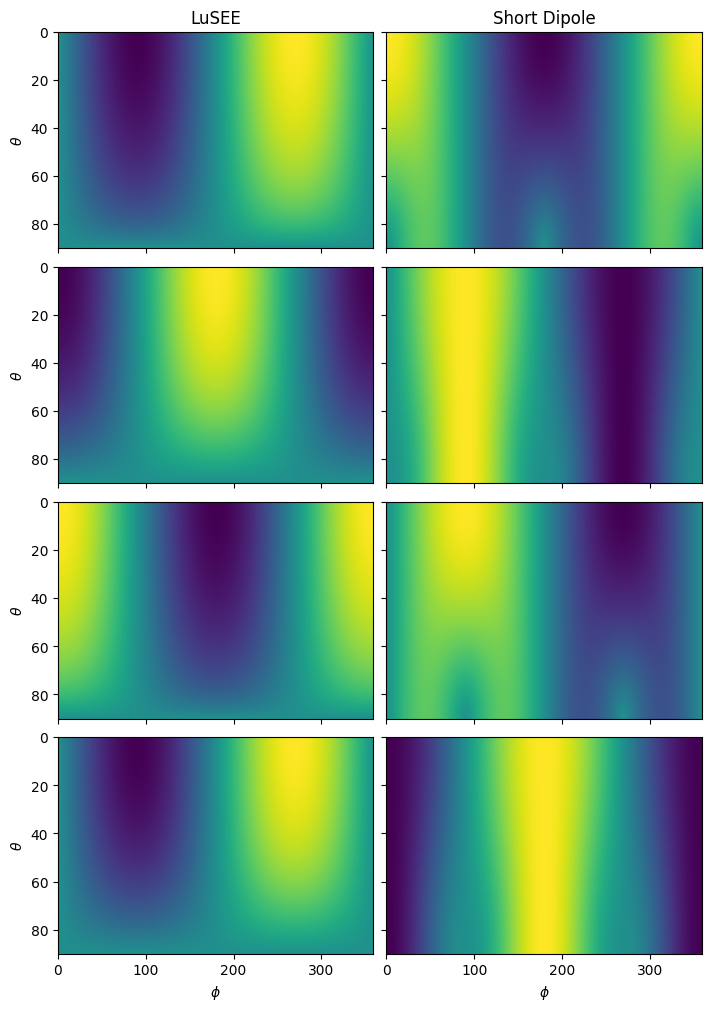

In [13]:
fig, axs = plt.subplots(figsize=(7, 10), nrows=4, ncols=2, sharex=True, sharey=True, layout="constrained")
extent = np.rad2deg([phi.min(), phi.max(), theta.max(), theta.min()])
for i in range(2):
    axs[i, 0].imshow(lusee_X[i], extent=extent, aspect="auto")
    axs[i, 1].imshow(short_X[i], extent=extent, aspect="auto")
    axs[2+i, 0].imshow(lusee_Y[i], extent=extent, aspect="auto")
    axs[2+i, 1].imshow(short_Y[i], extent=extent, aspect="auto")

axs[0, 0].set_title("LuSEE")
axs[0, 1].set_title("Short Dipole")


plt.setp(axs[:, 0], ylabel="$\\theta$")
plt.setp(axs[-1], xlabel="$\\phi$")
plt.show()

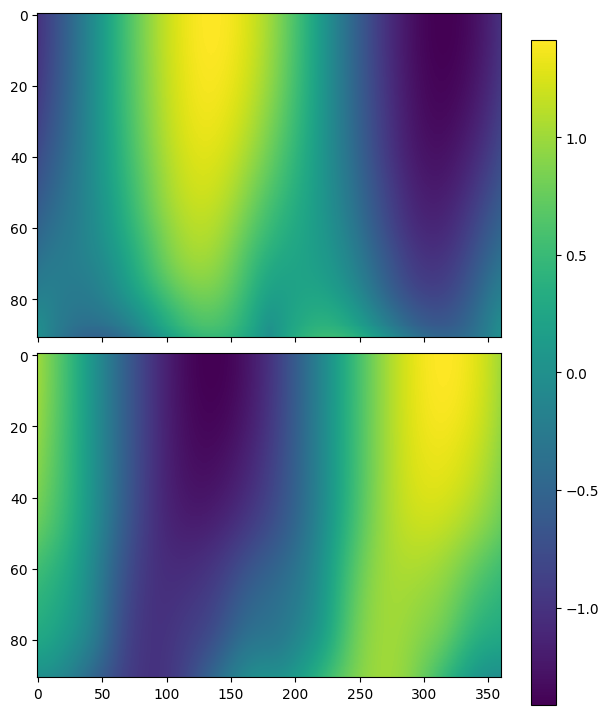

In [8]:
fig, axs = plt.subplots(figsize=(5, 7), nrows=2, ncols=1, sharex=True, sharey=True, layout="constrained")


for i in range(2):
    im = axs[i].imshow(lusee_X.real[i] -  short_X[i], aspect="auto")

cbar_ax = fig.add_axes([1.05, 0., 0.05, .95])
fig.colorbar(im, cax=cbar_ax)
#plt.setp(axs[:, 0], ylabel="theta")
#plt.setp(axs[-1], xlabel="phi")
plt.show()